In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 

In [2]:
df1=pd.read_csv("C:\\Users\\archy\\Downloads\\Fever.csv")

In [3]:
df1.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [4]:
df1.shape

(36, 4)

In [5]:
df1.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [6]:
df1.Volunteer.value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

In [7]:
df1.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [8]:
df1.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

### 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

#### Null and Alternate Hypothesis for variable 'A'
- H0 : μA1 = μA2 = μA3 (Relief mean of dose of ingredient A1 is equal to A2 equal to A3)
      -- Relief mean in all three A ingredient are same 
- H1 : (Relief mean dose of at least one of the ingredient out of A1 and A2 and A3 is different)
      -- Relief mean in at least one of the dose of ingredient is different

#### Null and Alternate Hypothesis for variable  'B'
- H0 : μB1 = μB2 = μB3 (Relief mean of med B1 is equal to B2 equal to B3)
        --   Relief mean in all three B ingredient are same 
- H1 :  (Relief mean of dose of at least one of the ingredient of B1 and B2 and B3 is different)
        --    Relief mean in at least one of the three B ingredient is different 


### 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [9]:
formula = 'Relief ~ C(A)'
model = ols(formula, df1).fit()
aov_table1= anova_lm(model)
print(aov_table1)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


- From the above calculations we can see that P-Value is less than the 0.05 hence we reject Null Hypothesis which means that at least one mean in dependent variable that is ingredient "A" is differnet.

### 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [10]:
formula = 'Relief ~ C(B)'
model = ols(formula, df1).fit()
aov_table2 = anova_lm(model)
print(aov_table2)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


- From the above formula we can see that the P-Value is less than the 0.05 hence we reject the Null Hypothesis. At least one  mean in ingredient "B" is different.

### 1.4) Analyse the effects of one variable on another with the help of an interaction plot.
- What is the interaction between the two treatments?
- [hint: use the ‘pointplot’ function from the ‘seaborn’ function]

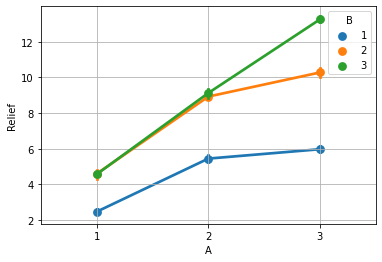

In [11]:
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=df1 )
plt.grid()
plt.show()

 - Above pointpot shows the interaction between the three doses of ingredient A and three doses of ingredient B with the dependent variable Relief and Variable B in hue.
- The hypothesis doesnt say that the mean relief at ingredient A and ingredient B are increasing with their doses but it just says that they are not equal.
- If we look at the "hue" for the ingredient "B" there as well we can see that there is increase in same direction in Relief count but again we cannot say that they are actually increasing, but just that they are not same.
- Also we can interpret that there is close relatioship with Dose 2 and 3 in both ingredient "A" and "B"
 

### 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

In [12]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


- Our Null Hypothesis states that there is no interaction. And Alternate Hypothesis states that there is interaction between two variables.
- Threre is  enough evidence that there is interaction between categorical variable "A" and Categorical variable"B" as P-Value is less that 0.05. Here we say that Null Hypothesis is rejcted and Varibale A and B do have interacting effect when it comes to mean Relief.

In [13]:
#ANOVA test to determine the interaction between the two variables when it comes to check it with one more
formula = 'Relief ~ C(A) + C(B) +C(Volunteer)+ C(A):C(B)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)

                df      sum_sq     mean_sq            F        PR(>F)
C(A)           2.0  220.020000  110.010000  1700.333453  1.403185e-26
C(B)           2.0  123.660000   61.830000   955.655098  1.322903e-23
C(Volunteer)   3.0    0.072222    0.024074     0.372093  7.738510e-01
C(A):C(B)      4.0   29.425000    7.356250   113.699463  3.119446e-15
Residual      24.0    1.552778    0.064699          NaN           NaN


- we can check wheather there is any role played by one more variable which is a categorical variable "Volunteer"

### 1.6) Mention the business implications of performing ANOVA for this particular case study.

- Analysis of Variance helps in building model which will help us in deciding wheather there is any correlation among the continuous variable and continuous correlated variable.
- Here we can say that the relief on volunteer of doese of med A is not at all impacted by the doses of med B. therefore while doing this particular research researcher can use this while administring the doses.

In [14]:
df2 = pd.read_csv("C:\\Users\\archy\\Downloads\\Education+-+Post+12th+Standard (1).csv")

In [15]:
df2.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [16]:
df2.shape

(777, 18)

In [17]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [18]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [19]:
df2.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [20]:
df2.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [21]:
Dupes = df2.duplicated()
sum(Dupes)

0

### 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.¶

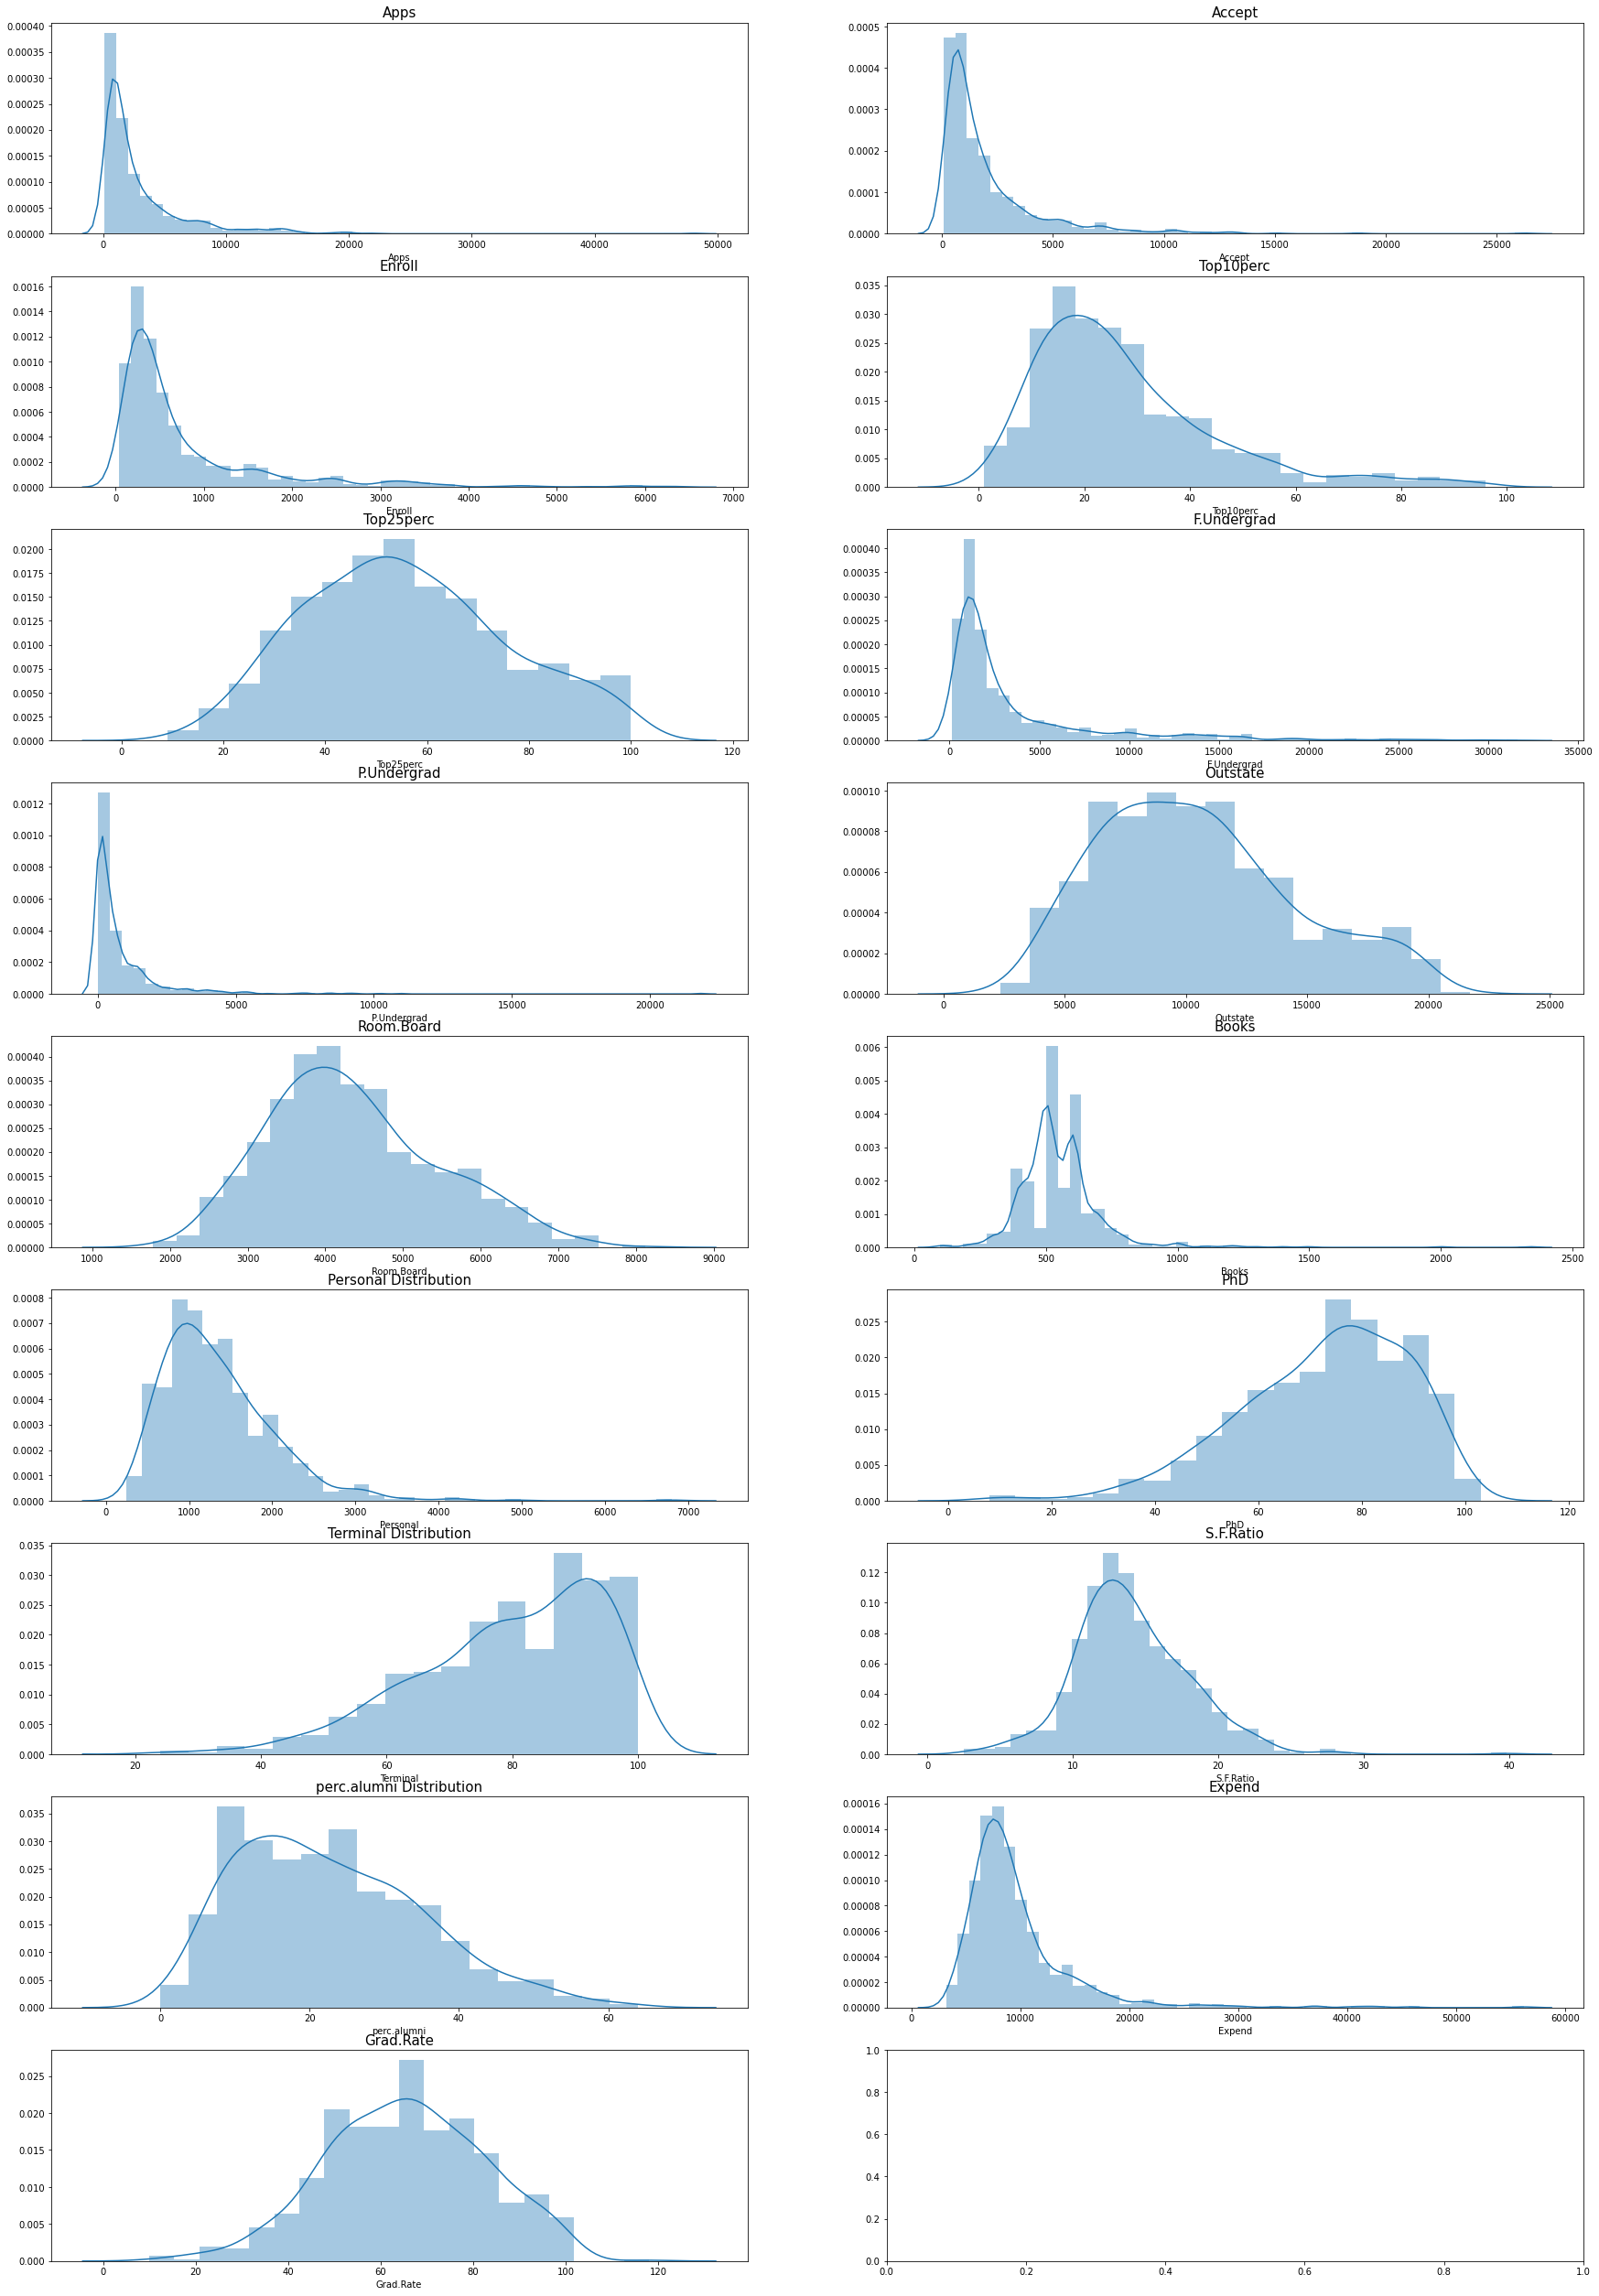

In [22]:
#Uni-Variate except the name column which is the object data type.

fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(30, 45)

a = sns.distplot(df2['Apps'] , ax=axes[0][0])
a.set_title("Apps",fontsize=15)


a = sns.distplot(df2['Accept'] , ax=axes[0][1])
a.set_title("Accept",fontsize=15)


a = sns.distplot(df2['Enroll'] , ax=axes[1][0])
a.set_title("Enroll",fontsize=15)

a = sns.distplot(df2['Top10perc'] , ax=axes[1][1])
a.set_title("Top10perc",fontsize=15)

a = sns.distplot(df2['Top25perc'] , ax=axes[2][0])
a.set_title("Top25perc",fontsize=15)


a = sns.distplot(df2['F.Undergrad'] , ax=axes[2][1])
a.set_title("F.Undergrad",fontsize=15)

a = sns.distplot(df2['P.Undergrad'] , ax=axes[3][0])
a.set_title("P.Undergrad",fontsize=15)


a = sns.distplot(df2['Outstate'] , ax=axes[3][1])
a.set_title("Outstate",fontsize=15)


a = sns.distplot(df2['Room.Board'] , ax=axes[4][0])
a.set_title("Room.Board",fontsize=15)


a = sns.distplot(df2['Books'] , ax=axes[4][1])
a.set_title("Books",fontsize=15)


a = sns.distplot(df2['Personal'] , ax=axes[5][0])
a.set_title("Personal Distribution",fontsize=15)

a = sns.distplot(df2['PhD'] , ax=axes[5][1])
a.set_title("PhD",fontsize=15)

a = sns.distplot(df2['Terminal'] , ax=axes[6][0])
a.set_title("Terminal Distribution",fontsize=15)


a = sns.distplot(df2['S.F.Ratio'] , ax=axes[6][1])
a.set_title("S.F.Ratio",fontsize=15)


a = sns.distplot(df2['perc.alumni'] , ax=axes[7][0])
a.set_title("perc.alumni Distribution",fontsize=15)


a = sns.distplot(df2['Expend'] , ax=axes[7][1])
a.set_title("Expend",fontsize=15)


a = sns.distplot(df2['Grad.Rate'] , ax=axes[8][0])
a.set_title("Grad.Rate",fontsize=15)


plt.show();

#### Inferences drawn from the above uni-variate data are - 
- Apps, Accept, Enroll, P.Undergrad, F. Undergrad, Books, Top10perc are very much right skewd.
- We can see that Top25perc, Grad Rate, and Outstate are normally distributed.Even S. F. Ratio is quiet normally distributed.
- The variables like Terminal, P.hD are left skewed.

- Looking at the above historams and Boxplots we can say that there are lot of outliers in most of all the variable. We will perform Multi-Variate and then treat the outliers in the dat

## Multi-Variate analysis

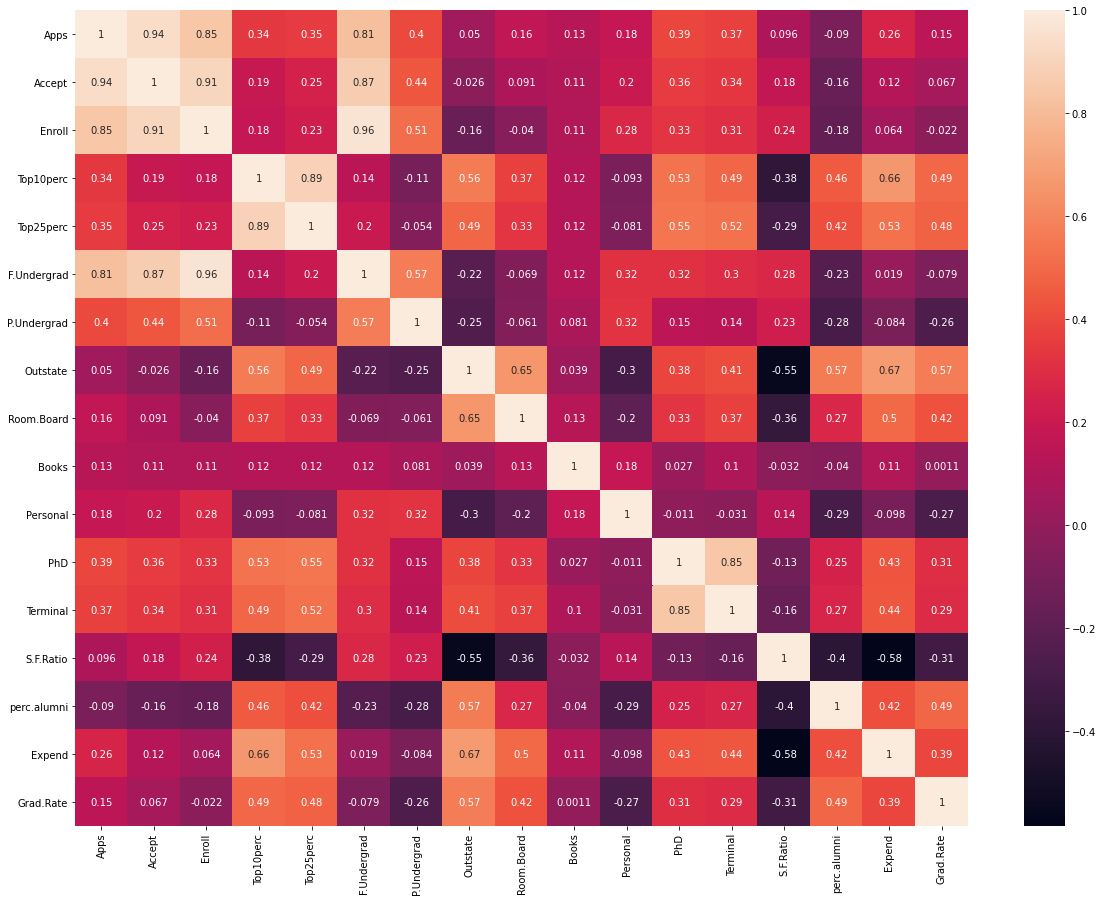

In [23]:
plt.subplots(figsize=(20,15))
sns.heatmap(df2.corr(), annot=True);

### Multivariate analysis using Heatmap
1. Apps, Accept, Enroll has very good correlation with each other and with F. undergrad, but they have negative correlation with Room.Board and Outstate.
2. Ph.D and Terminal has correlation with each other but they have negative correlation with 

### Outliers treatment

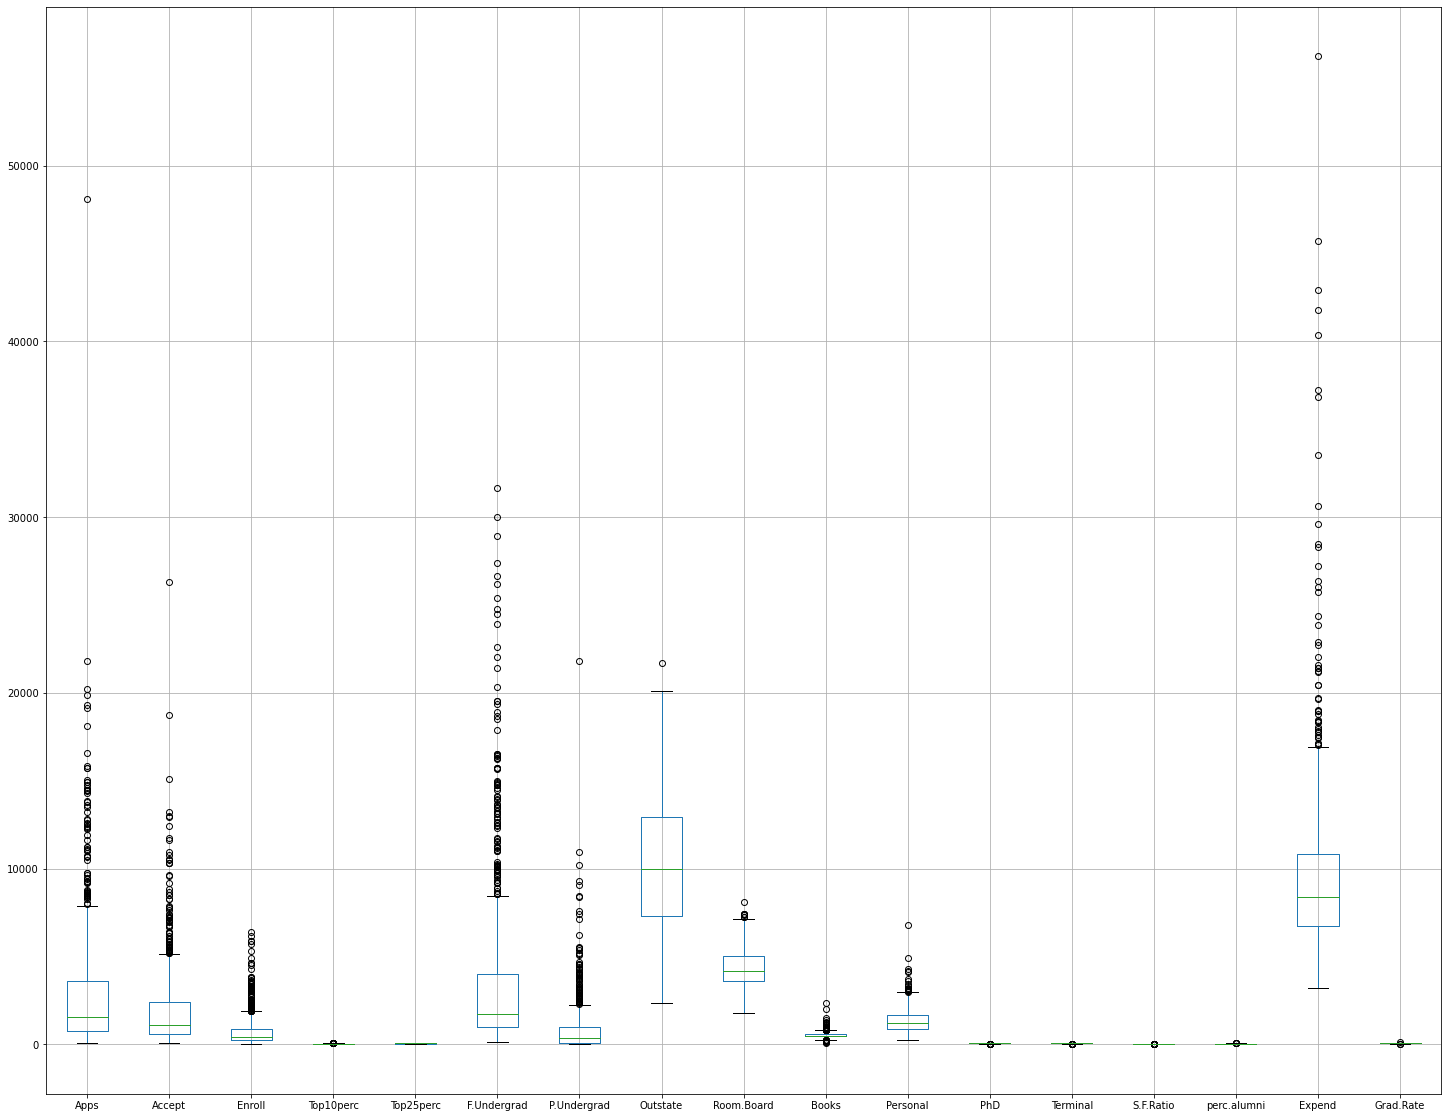

In [24]:
df2.boxplot(figsize=(25,20));

#### The above Boxplot shown with the outliers available in dataset, which needs to be treated befroe we do the scaling.

In [25]:
## We are going to perform outliers treatment before we do the scaling on the dateset.

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
lrapps,urapps=remove_outlier(df2['Apps'])
df2['Apps']=np.where(df2['Apps']>urapps,urapps,df2['Apps'])
df2['Apps']=np.where(df2['Apps']<lrapps,lrapps,df2['Apps'])

laccept,uaccept=remove_outlier(df2['Accept'])
df2['Accept']=np.where(df2['Accept']>uaccept,uaccept,df2['Accept'])
df2['Accept']=np.where(df2['Accept']<laccept,laccept,df2['Accept'])

lenroll,uenroll=remove_outlier(df2['Enroll'])
df2['Enroll']=np.where(df2['Enroll']>uenroll,uenroll,df2['Enroll'])
df2['Enroll']=np.where(df2['Enroll']<lenroll,lenroll,df2['Enroll'])

ltop10,utop10=remove_outlier(df2['Top10perc'])
df2['Top10perc']=np.where(df2['Top10perc']>utop10,utop10,df2['Top10perc'])
df2['Top10perc']=np.where(df2['Top10perc']<ltop10,ltop10,df2['Top10perc'])

ltop25,utop25=remove_outlier(df2['Top25perc'])
df2['Top25perc']=np.where(df2['Top25perc']>utop25,utop25,df2['Top25perc'])
df2['Top25perc']=np.where(df2['Top25perc']<ltop25,ltop25,df2['Top25perc'])

lf_undergrad,uf_undergrad=remove_outlier(df2['F.Undergrad'])
df2['F.Undergrad']=np.where(df2['F.Undergrad']>uf_undergrad,uf_undergrad,df2['F.Undergrad'])
df2['F.Undergrad']=np.where(df2['F.Undergrad']<lf_undergrad,lf_undergrad,df2['F.Undergrad'])

lp_undergrad,up_undergrad=remove_outlier(df2['P.Undergrad'])
df2['P.Undergrad']=np.where(df2['P.Undergrad']>up_undergrad,up_undergrad,df2['P.Undergrad'])
df2['P.Undergrad']=np.where(df2['P.Undergrad']<lp_undergrad,lp_undergrad,df2['P.Undergrad'])

loutstate,uoutstate=remove_outlier(df2['Outstate'])
df2['Outstate']=np.where(df2['Outstate']>uoutstate,uoutstate,df2['Outstate'])
df2['Outstate']=np.where(df2['Outstate']<loutstate,loutstate,df2['Outstate'])

lroom_board,uroom_board=remove_outlier(df2['Room.Board'])
df2['Room.Board']=np.where(df2['Room.Board']>uroom_board,uroom_board,df2['Room.Board'])
df2['Room.Board']=np.where(df2['Room.Board']<lroom_board,lroom_board,df2['Room.Board'])

lbooks,ubooks=remove_outlier(df2['Books'])
df2['Books']=np.where(df2['Books']>ubooks,ubooks,df2['Books'])
df2['Books']=np.where(df2['Books']<lbooks,lbooks,df2['Books'])


lpersonal,upersonal=remove_outlier(df2['Personal'])
df2['Personal']=np.where(df2['Personal']>upersonal,upersonal,df2['Personal'])
df2['Personal']=np.where(df2['Personal']<lpersonal,lpersonal,df2['Personal'])

lphD,uphD=remove_outlier(df2['PhD'])
df2['PhD']=np.where(df2['PhD']>uphD,uphD,df2['PhD'])
df2['PhD']=np.where(df2['PhD']<lphD,lphD,df2['PhD'])

lterminal,uterminal=remove_outlier(df2['Terminal'])
df2['Terminal']=np.where(df2['Terminal']>uterminal,uterminal,df2['Terminal'])
df2['Terminal']=np.where(df2['Terminal']<lterminal,lterminal,df2['Terminal'])

lratio,uratio=remove_outlier(df2['S.F.Ratio'])
df2['S.F.Ratio']=np.where(df2['S.F.Ratio']>uratio,uratio,df2['S.F.Ratio'])
df2['S.F.Ratio']=np.where(df2['S.F.Ratio']<lratio,lratio,df2['S.F.Ratio'])

lperc_alumni,uperc_alumni=remove_outlier(df2['perc.alumni'])
df2['perc.alumni']=np.where(df2['perc.alumni']>uperc_alumni,uperc_alumni,df2['perc.alumni'])
df2['perc.alumni']=np.where(df2['perc.alumni']<lperc_alumni,lperc_alumni,df2['perc.alumni'])

lexpend,uexpend=remove_outlier(df2['Expend'])
df2['Expend']=np.where(df2['Expend']>uexpend,uexpend,df2['Expend'])
df2['Expend']=np.where(df2['Expend']<lexpend,lexpend,df2['Expend'])

lgrad,ugrad=remove_outlier(df2['Grad.Rate'])
df2['Grad.Rate']=np.where(df2['Grad.Rate']>ugrad,ugrad,df2['Grad.Rate'])
df2['Grad.Rate']=np.where(df2['Grad.Rate']<lgrad,lgrad,df2['Grad.Rate'])





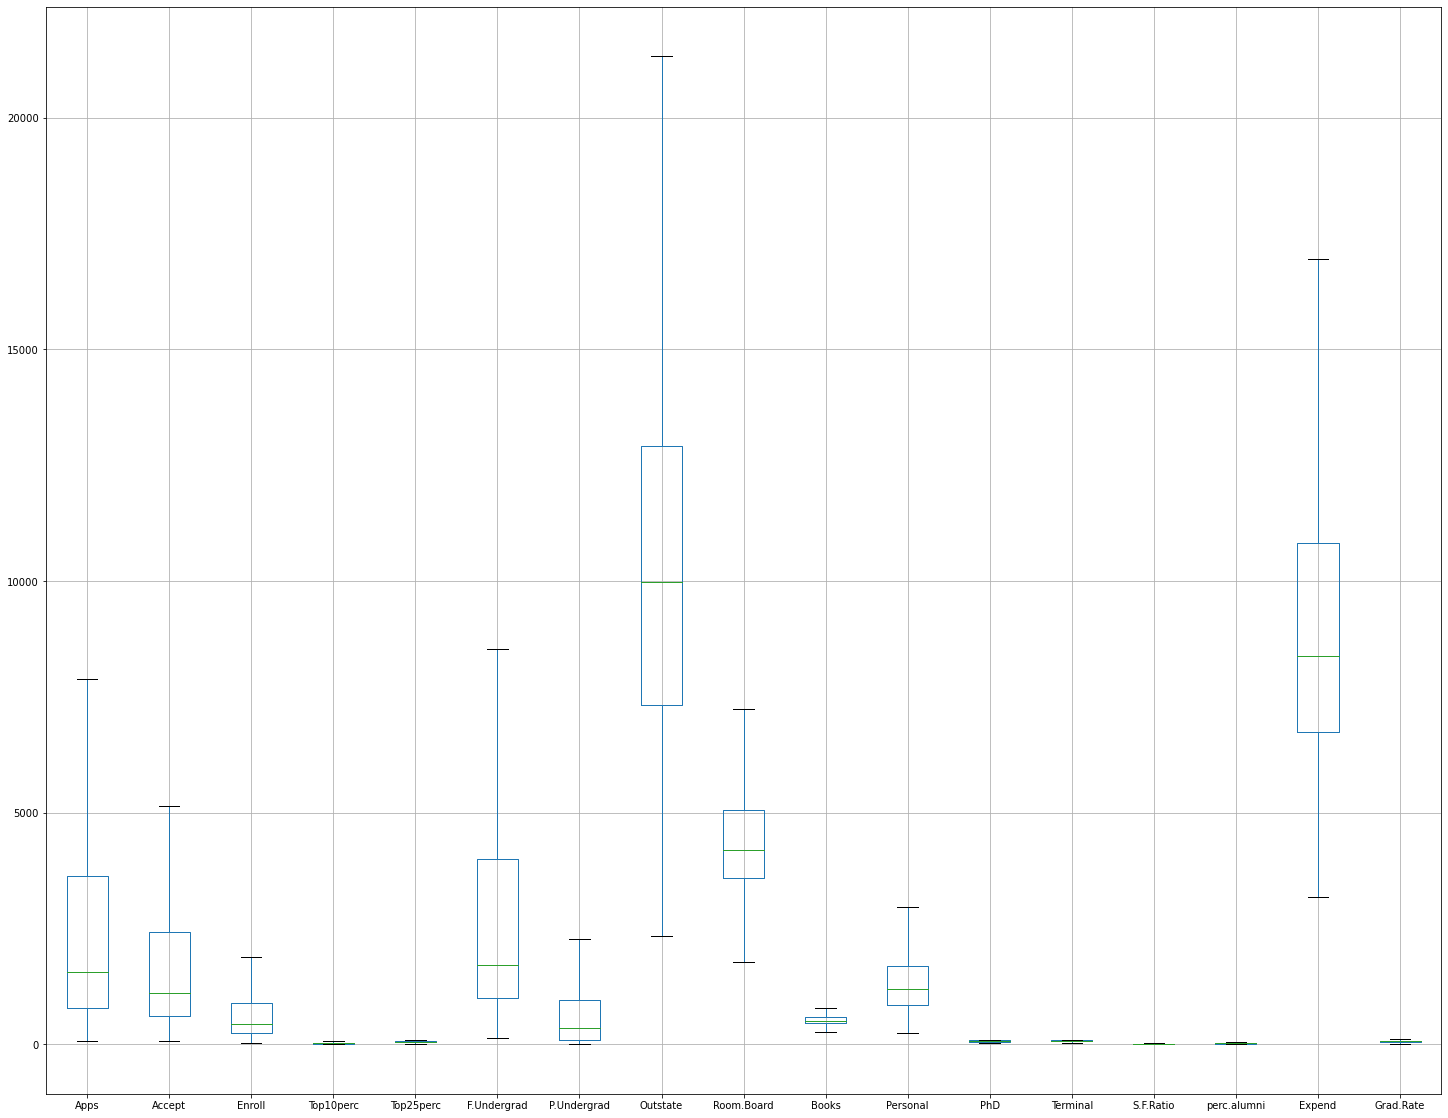

In [27]:
df2.boxplot(figsize=(25,20));

#### The above boxplot is after the removing the outliers, but before scaling the dataset.

- Scaling helps in bringing variable of different values under the same scale. This helps in understanding the variable in different units and different values with same measure.
- We will use function StandardScaler from the sklearn to scale variables and then normalise them using the formula (x-mean)/std deviation.

In [28]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [29]:
df2_scale = df2.copy()

In [30]:
df2_scale['Apps'] = std_scale.fit_transform(df2[['Apps']])
df2_scale['Accept'] = std_scale.fit_transform(df2[['Accept']])
df2_scale['Enroll'] = std_scale.fit_transform(df2[['Enroll']])
df2_scale['Top10perc']= std_scale.fit_transform(df2[['Top10perc']])
df2_scale['Top25perc'] = std_scale.fit_transform(df2[['Top25perc']])
df2_scale['F.Undergrad'] = std_scale.fit_transform(df2[['F.Undergrad']])
df2_scale['P.Undergrad'] = std_scale.fit_transform(df2[['P.Undergrad']])
df2_scale['Outstate']= std_scale.fit_transform(df2[['Outstate']])
df2_scale['Room.Board'] = std_scale.fit_transform(df2[['Room.Board']])
df2_scale['Books'] = std_scale.fit_transform(df2[['Books']])
df2_scale['Personal'] = std_scale.fit_transform(df2[['Personal']])
df2_scale['PhD']= std_scale.fit_transform(df2[['PhD']])
df2_scale['Terminal'] = std_scale.fit_transform(df2[['Terminal']])
df2_scale['S.F.Ratio'] = std_scale.fit_transform(df2[['S.F.Ratio']])
df2_scale['perc.alumni'] = std_scale.fit_transform(df2[['perc.alumni']])
df2_scale['Expend']= std_scale.fit_transform(df2[['Expend']])
df2_scale['Grad.Rate']= std_scale.fit_transform(df2[['Grad.Rate']])

df2_scale.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,Adelphi University,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,Adrian College,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,Agnes Scott College,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,Alaska Pacific University,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


### 2.3) Comment on the comparison between covariance and the correlation matrix.

- ** The values of covariance is affected by the change of scale of the varibale.
- ** Whereas the values of correlation are not affected by the change of scale of the variable.

- Correlation values are standardized whereas, covariance values are not.
- Covariance indiates direction of linear relationship between variable.
- Correlation indicates both strength and direction of linear relationship between two variable.


In [31]:
df2.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


### 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

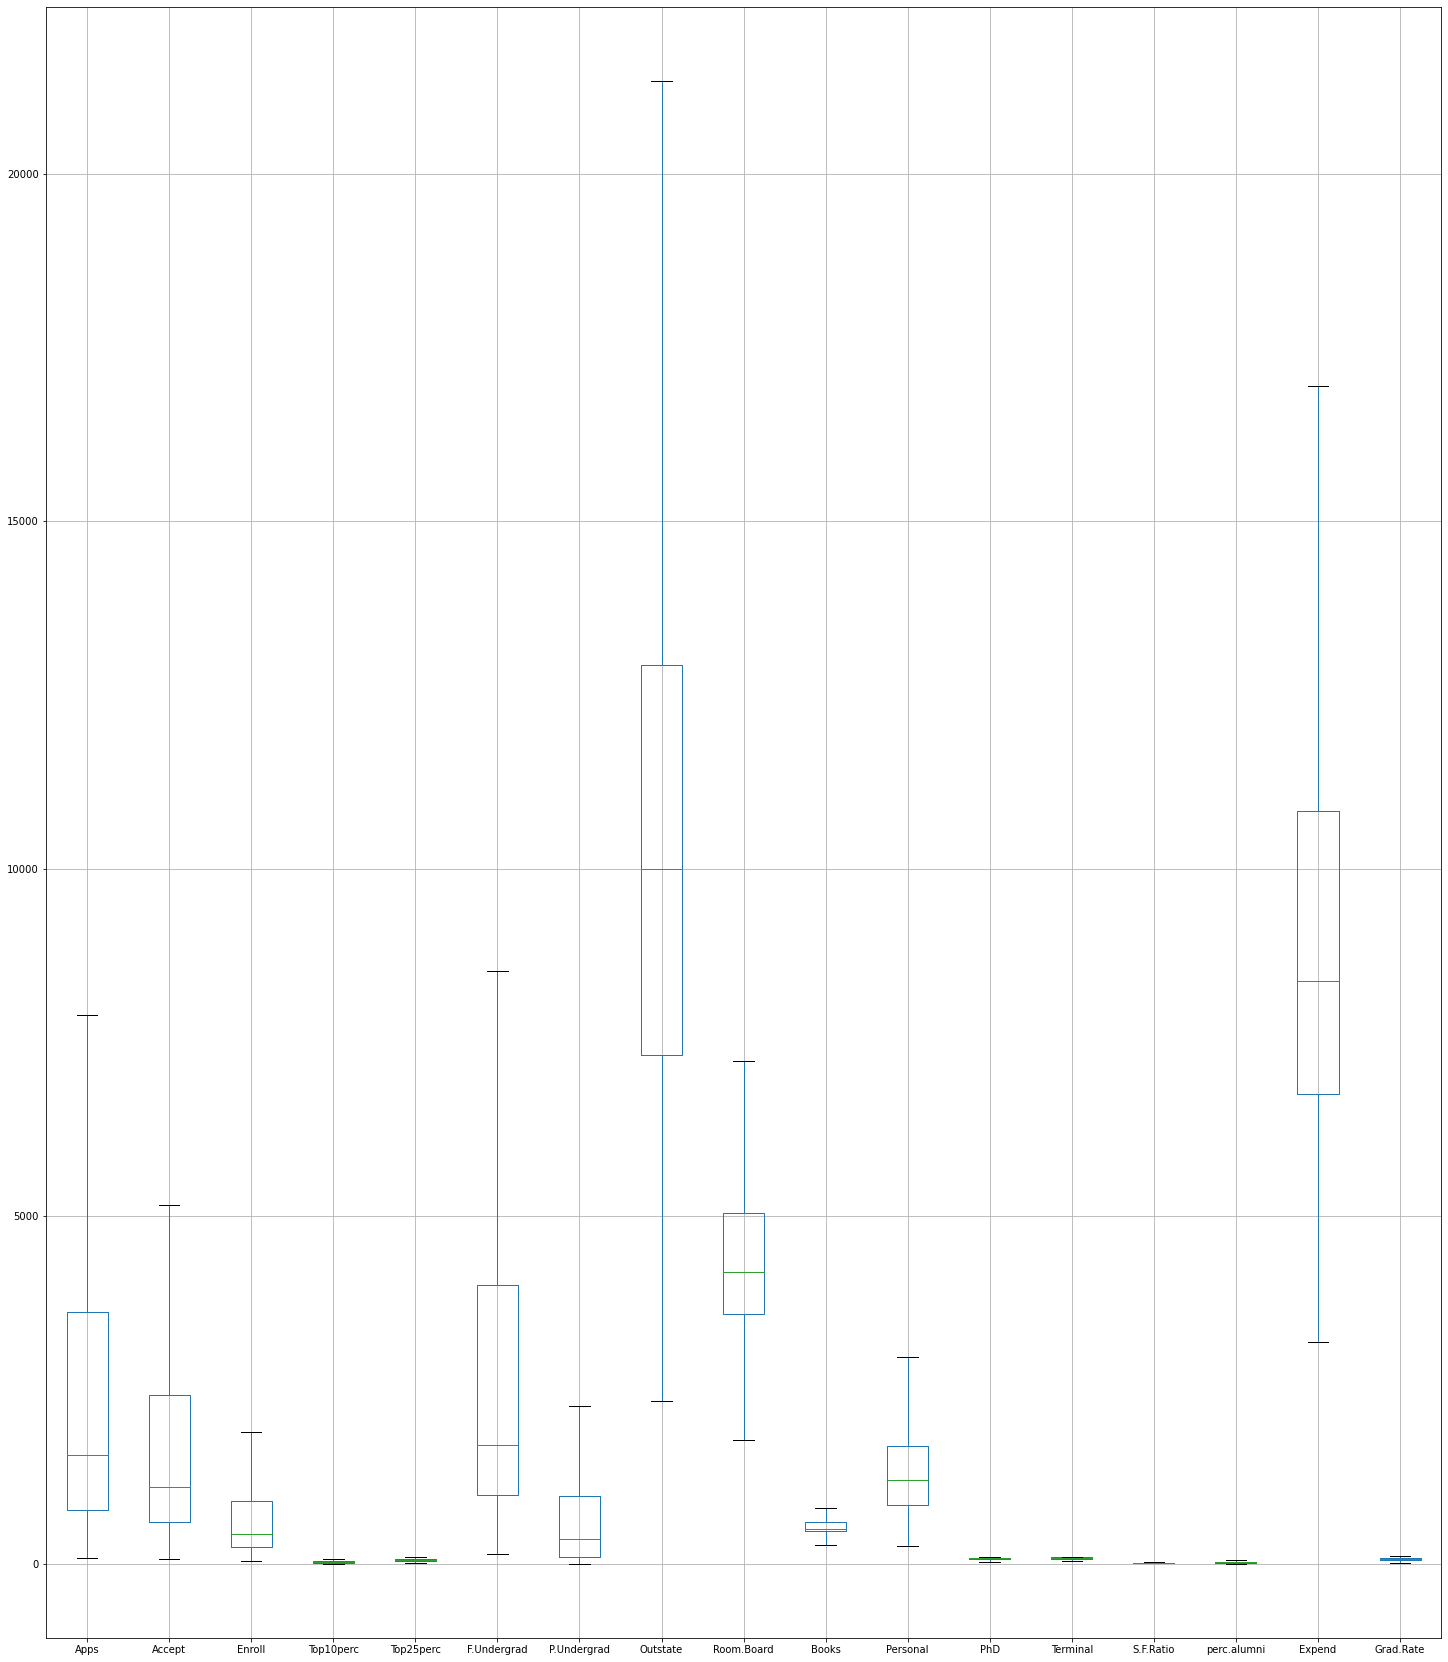

In [32]:
df2.boxplot(figsize=(25,30));

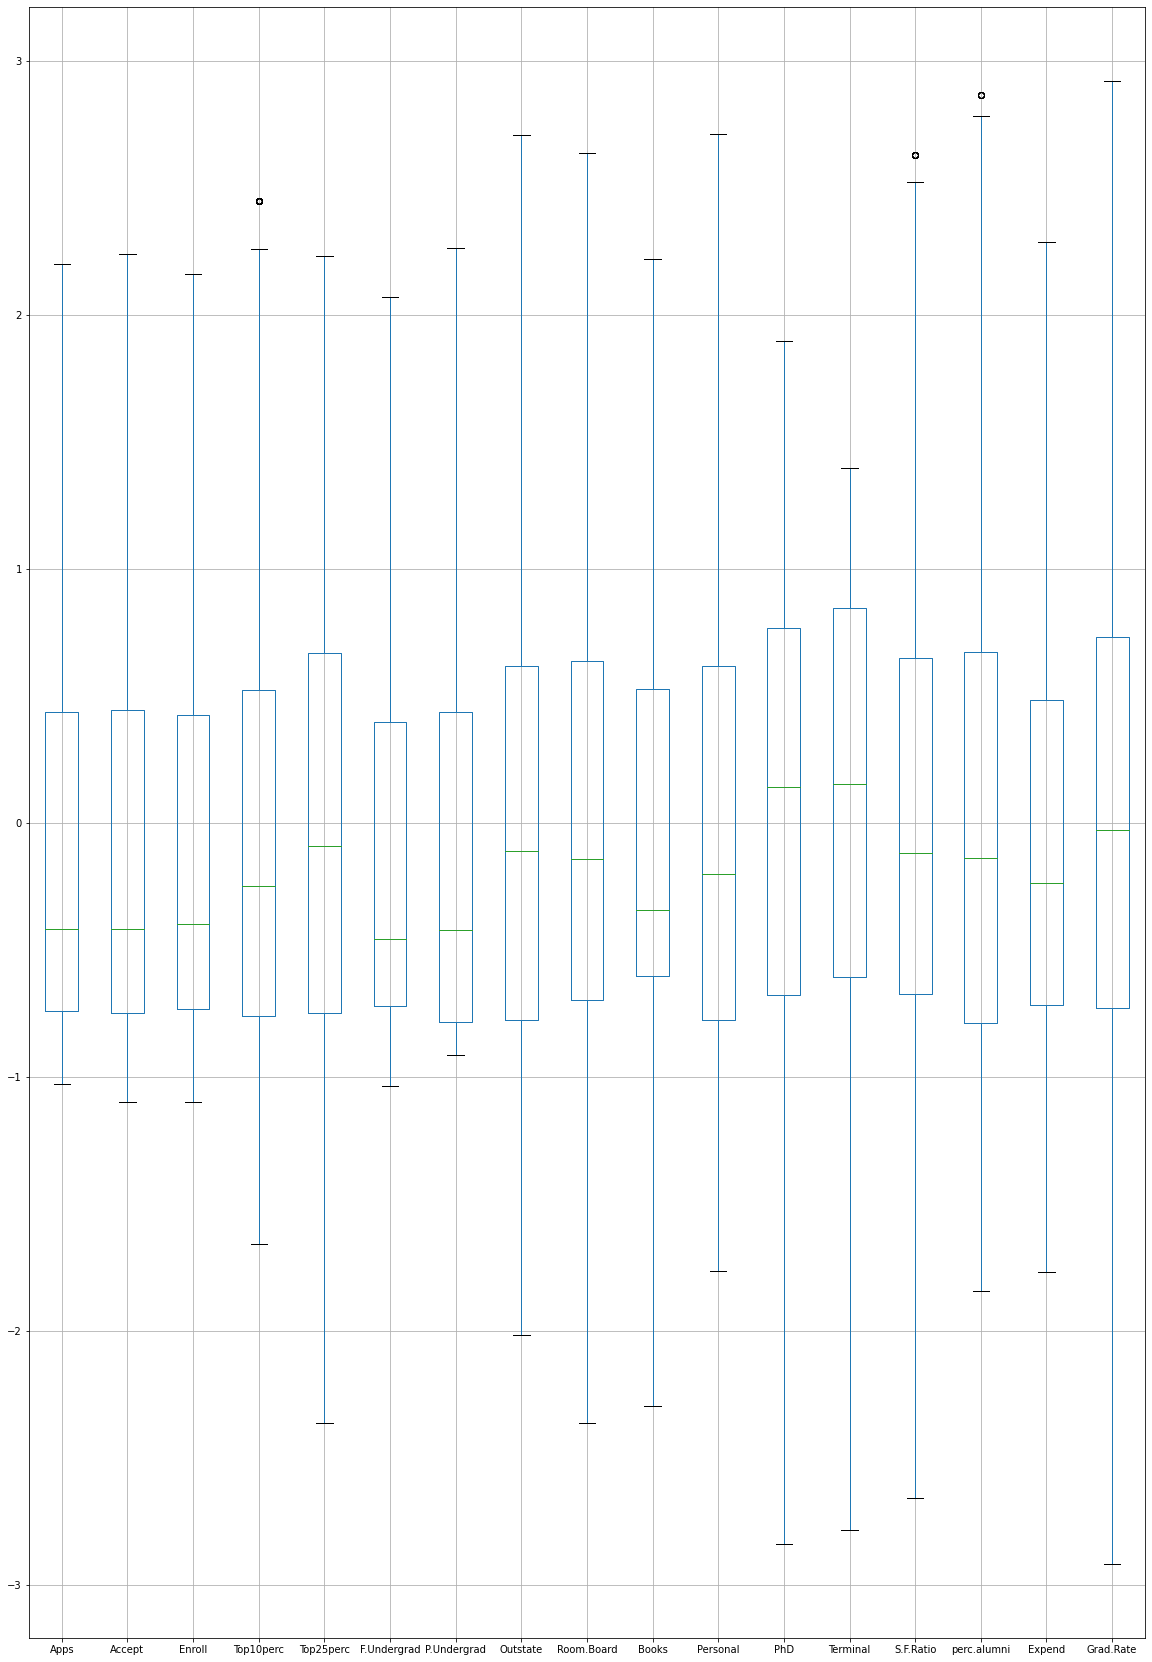

In [33]:
## bolow boxplot is created with the set after scaling.
#plt.subplots(figsize=(20,30))
df2_scale.boxplot(figsize=(20,30));

- Above both boxplots shows us the befero and after the scaling. 
- first plot shows befere the scaling and second one shows after the scaling.
- *** we can say that after the scaling there are some more new outliers which have been emerged. Though we had removed all the outliers befero the scaling.
- *** Now in the new boxplot we can see that there are new ouliers in Top10perc, S.F.Ratio, Perc alumni

In [34]:
data_new = df2_scale.drop(["Names"], axis = 1)
data_new.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


### 2.5) Build the covariance matrix, eigenvalues, and eigenvector.

In [35]:
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [36]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n%s ', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
%s  [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]
Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01 -8.10177245e-02  9.87761685e-02
   2.19898081e-01 -2.18800617e-03  2.83715076e-02  8.99498102e-02
  -1.30566998e-01  1.56464458e-01  8.62132843e-02 -1.82169814e-01
   5.99137640e-01 -8.99775288e-02 -8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01 -1.07658626e-01  1.18140437e-01
   1.89634940e-01  1.65212882e-02  1.29584896e-02  1.37606312e-01
  -1.42275847e-01  1.49209799e-01  4.25899061e-02  3.91041719e-01
  -6.61496927e-01 -1.58861886e-01 -4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01 -8.55296892e-02  9.30717094e-03
   1.62314818e-01  6.80794143e-02  1.52403625e-02  1.44216938e-01
  -5.08712481e-02  6.48997860e-02  4.38408622e-02 -7.16684935e-01
  -2.33

### 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

In [37]:
from sklearn.decomposition import PCA

# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 17 to 6)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()
#pca.components_

array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004475,  2.12212754, -0.50151255, ...,  0.32216034,
         1.32596556, -1.42543836],
       [-1.0084224 ,  3.13894114, -0.03637345, ..., -0.58725873,
         0.07770705, -1.30027369],
       [-0.3668862 ,  2.45321184,  0.76599685, ...,  0.17522458,
         1.36851673,  0.72091762],
       [-0.69747585,  0.99485855, -1.02623665, ...,  0.5040428 ,
        -0.82274571,  1.05180969]])

In [38]:
#calculated componentes (co-efficient). we will use them calculating the PC's
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177249e-02, -1.07658625e-01, -8.55296905e-02,
         7.88293850e-02,  5.07938247e-02, -7.37077818e-02,
        -4.03568701e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [39]:
# getting the Explicit value of first Principal Componenet.(PC1)
pca1 = PCA(n_components=1)
data_reduced = pca1.fit_transform(data_new)
data_reduced.transpose()
pca1.components_


array([[ 0.26217154,  0.23056246,  0.1892764 ,  0.33887452,  0.33469053,
         0.16329301,  0.02247971,  0.28354729,  0.24418659,  0.09670828,
        -0.03522996,  0.3264107 ,  0.32311598, -0.16315164,  0.18661083,
         0.32895585,  0.23882245]])

-  The Above matrix shows us the values calculated and compressed in PC1. 

### 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [40]:
## PCA Components calculated individual.
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639])

In [41]:
## Calculating the cumulative values of the eigenvalues

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


- Above are the cumulative eigen values will help in deciding how many PC's are needed for analysis and how many are exacly enough in decision making. 
- We will take the decision of optimum number of cummulative variance on the basis of Scree plot below.

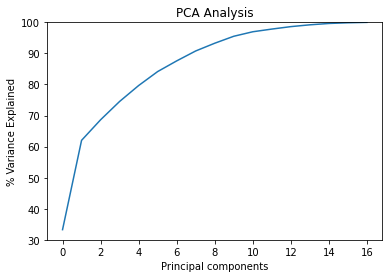

In [42]:
## Deciding optimum number of principal componenet using scree plot

plt.ylabel('% Variance Explained')
plt.xlabel('Principal components')
plt.title('PCA Analysis')
plt.ylim(30,100)
#plt.style.context('seaborn-whitegrid')



plt.plot(cum_var_exp);

* PC6 is crossing 80% of variance and and we can keep the PC for analysis uptill we see the sharp change in the slope of the line connecting adjucent PC
* We should keep only the PC which explains the maximum variance

In [43]:
## Exporting the data of principal component in the dataframe.

columns = ['pca_%i' % i for i in range(6)]
df_pca = DataFrame(pca.transform(data_new), columns=columns, index=data_new.index)
df_pca.head()


,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5
0,-1.602499,0.993683,0.030045,-1.008422,-0.366886,-0.697476
1,-1.804675,-0.070415,2.122128,3.138941,2.453212,0.994859
2,-1.608283,-1.382792,-0.501513,-0.036373,0.765997,-1.026237
3,2.803644,-3.367395,0.367768,-0.632914,-1.192601,-1.457080
4,-2.200868,-0.099348,3.122523,0.657707,-1.828044,0.140915


### 2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

In [44]:
# To anlyse the business implications of PCA we will start with correlation between components and features.
df_pca = pd.DataFrame(pca.components_,columns=list(data_new))
df_pca.head(10)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.262172,0.230562,0.189276,0.338875,0.334691,0.163293,0.022480,0.283547,0.244187,0.096708,-0.035230,0.326411,0.323116,-0.163152,0.186611,0.328956,0.238822
1,0.314136,0.344624,0.382813,-0.099319,-0.059506,0.398636,0.357550,-0.251864,-0.131909,0.093974,0.232440,0.055139,0.043033,0.259805,-0.257093,-0.160009,-0.167524
2,-0.081018,-0.107659,-0.085530,0.078829,0.050794,-0.073708,-0.040357,-0.014939,0.021138,0.697121,0.530973,-0.081113,-0.058979,-0.274151,-0.103716,0.184206,-0.245336
3,0.098776,0.118140,0.009307,-0.369115,-0.416824,0.013950,0.225351,0.262975,0.580894,-0.036156,-0.114983,-0.147261,-0.089008,-0.259486,-0.223982,0.213756,-0.036192
4,0.219898,0.189635,0.162315,0.157211,0.144449,0.102728,-0.095679,0.037275,-0.069108,0.035406,-0.000475,-0.550787,-0.590407,-0.142843,0.128216,-0.022424,0.356843
5,0.002188,-0.016521,-0.068079,-0.088866,-0.027627,-0.051647,-0.024538,-0.020386,0.237267,0.638605,-0.381496,0.003344,0.035412,0.468753,0.012567,-0.231562,0.313556


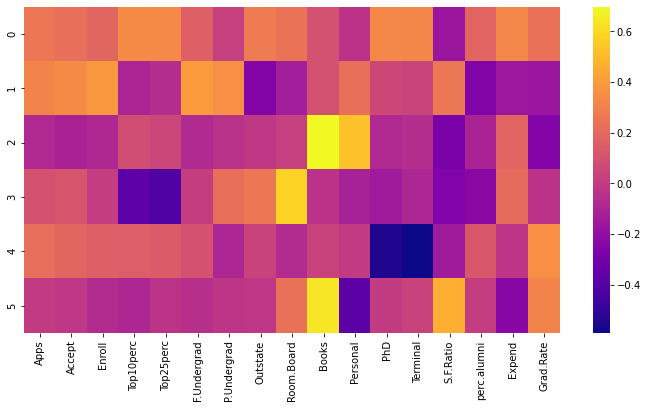

In [45]:
# we will form a heatmap to see the correlation between features and PC.
plt.figure(figsize=(12,6))
sns.heatmap(df_pca,cmap='plasma');

#### We will use this above heatmap to analyse the business implications on the above case study

In [ ]:
Eigenvec[0]